# Lecture 5 - Experimental Design

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [14]:
def PolynomialRegression(x,t,M):
    X = np.array([x**m for m in range(M+1)]).T
    w = np.linalg.inv(X.T@X)@X.T@t
    y = X@w
    error = t-y
    return w, y, error

def PolynomialRegression_test(x,M,w):
    X = np.array([x**m for m in range(M+1)]).T 
    y = X@w
    return y

In [15]:
data = pd.read_csv('beer_foam.csv')

data

,Time,Erdinger,Augustinerbrau,Budweiser
0,0,17.0,14.0,14.0
1,15,16.1,11.8,12.1
2,30,14.9,10.5,10.9
3,45,14.0,9.3,10.0
4,60,13.2,8.5,9.3
5,75,12.5,7.7,8.6
6,90,11.9,7.1,8.0
7,105,11.2,6.5,7.5
8,120,10.7,6.0,7.0
9,150,9.7,5.3,6.2


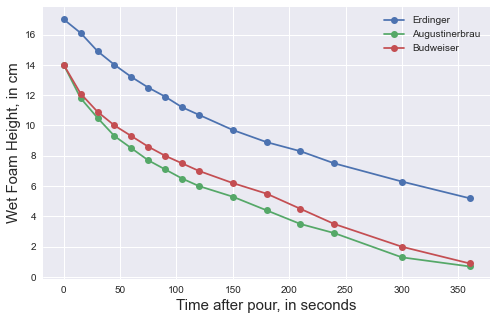

In [16]:
plt.figure(figsize=(8,5))

plt.plot(data['Time'], data['Erdinger'], '-o', label='Erdinger')
plt.plot(data['Time'], data['Augustinerbrau'], '-o', label='Augustinerbrau')
plt.plot(data['Time'], data['Budweiser'], '-o', label='Budweiser')
plt.legend()
plt.xlabel('Time after pour, in seconds', fontsize=15)
plt.ylabel('Wet Foam Height, in cm', fontsize=15);

In [17]:
x = data['Time'].to_numpy() # input data

t = data[['Erdinger','Augustinerbrau','Budweiser']].to_numpy() # desired labels, for each brand of beer

Fitting a polynomial regression:

In [18]:
M = 3

w_erd, y_erd, e_erd = PolynomialRegression(x, t[:,0], M)
w_aug, y_aug, e_aug = PolynomialRegression(x, t[:,1], M)
w_bud, y_bud, e_bud = PolynomialRegression(x, t[:,2], M)

In [19]:
erd_t450 = PolynomialRegression_test(450, M, w_erd)
aug_t450 = PolynomialRegression_test(450, M, w_aug)
bud_t450 = PolynomialRegression_test(450, M, w_bud)

print('At time t=450 s, the beer foam height predictions are:')
print('Erdinger : ',erd_t450, ' cm')
print('Augustinerbrau: ',aug_t450, ' cm')
print('Budweiser: ', bud_t450, ' cm')

At time t=450 s, the beer foam height predictions are:
Erdinger :  2.266862308056872  cm
Augustinerbrau:  -3.908693926936536  cm
Budweiser:  -3.742712167716494  cm


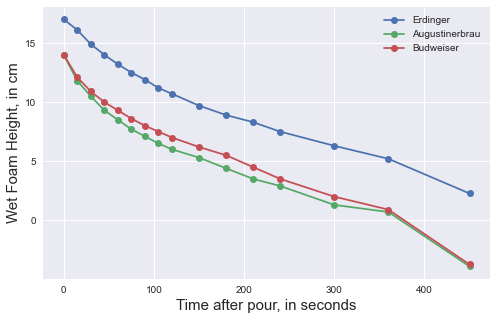

In [20]:
x2 = np.hstack((x,[450]))
t2 = np.vstack((t, [erd_t450, aug_t450, bud_t450]))

beers = ['Erdinger','Augustinerbrau','Budweiser']

plt.figure(figsize=(8,5))
for i in range(3):
    plt.plot(x2,t2[:,i], '-o', label=beers[i])
plt.legend()
plt.xlabel('Time after pour, in seconds', fontsize=15)
plt.ylabel('Wet Foam Height, in cm', fontsize=15);

Fitting an exponential model:

Now that we have transformed the desired label as the log, our goal is to fit a linear model to approximate:

\begin{align}
w_0 + w_1\mathbf{x}+\dots+w_M\mathbf{x}^M &= \ln(t) \\
\iff e^{w_0 + w_1\mathbf{x}+\dots+w_M\mathbf{x}^M} &= t
\end{align}

In [21]:
t_log = np.log(t)

In [22]:
M = 3

w_erd, y_erd, e_erd = PolynomialRegression(x, t_log[:,0], M)
w_aug, y_aug, e_aug = PolynomialRegression(x, t_log[:,1], M)
w_bud, y_bud, e_bud = PolynomialRegression(x, t_log[:,2], M)

In [23]:
erd_t450 = np.exp(PolynomialRegression_test(450, M, w_erd))
aug_t450 = np.exp(PolynomialRegression_test(450, M, w_aug))
bud_t450 = np.exp(PolynomialRegression_test(450, M, w_bud))

print('At time t=450 s, the beer foam height predictions are:')
print('Erdinger : ',erd_t450, ' cm')
print('Augustinerbrau: ',aug_t450, ' cm')
print('Budweiser: ', bud_t450, ' cm')

At time t=450 s, the beer foam height predictions are:
Erdinger :  3.576365026673414  cm
Augustinerbrau:  0.10540453796364184  cm
Budweiser:  0.12336148033893579  cm


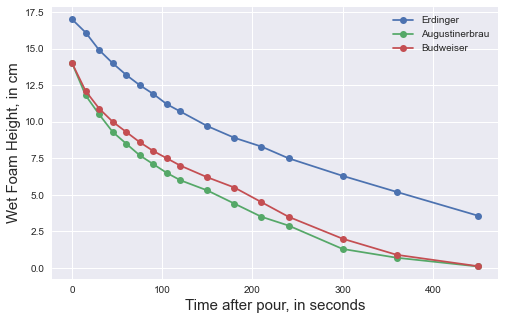

In [24]:
x2 = np.hstack((x,[450]))
t2 = np.vstack((t, [erd_t450, aug_t450, bud_t450]))

beers = ['Erdinger','Augustinerbrau','Budweiser']

plt.figure(figsize=(8,5))
for i in range(3):
    plt.plot(x2,t2[:,i], '-o', label=beers[i])
plt.legend()
plt.xlabel('Time after pour, in seconds', fontsize=15)
plt.ylabel('Wet Foam Height, in cm', fontsize=15);

# Experimental Design

**Motivation Question:** From the example of beer foam height, how to you select which ML model setting should you use?

* An ML model setting could simply be different parameter settings, such as different values for $M$ using the same model and features.
* But in general, "ML model setting" refers to the collection of choices for all steps in the training stage.

<div class="alert alert-info">
    <b>Experimental Design - How to use your data without cheating</b> 

In experimental design we need data to train (learn) models, and to test how good the models are. The training data needs to be different (disjoint) from the test data. Otherwise we would be testing the learned model on data it had previously seen, and we would get a biased estimate of the model's generalized performance.
    
Most machine learning algorithms require choosing parameter values; very often this is done by setting aside some of the training data to evaluate the quality of different parameter settings.
</div>

Typically we split the **training data** into three disjoint sets:
* **Training set**, 80\% - set of samples (and its labels) used to estimate the parameter values of the model (*learning the model*)
* **Validation set** - set of samples (and its labels) used for exploring and picking best parameter values
* **Test set**, typically 20\% - set of samples (and its labels) used for testing the model generalization performance, and testing hypotheses

1. The key thing to remember when planning experiments is that the test data is used to form conclusions but not to make decisions during model building. Basing decisions on test data results is frequently called *cheating* in the machine learning community, and often results in wrong conclusions.

2. Our generalization performance is only as good as our test set is representative of the true test data in application.

3. After all parameter value decisions have been made, we often use **ALL** training data for the final training of the system and deployment.

4. The training and validation sets may be rotated by using **cross-validation**.

### Beer Foam Example

Consider the beer foam example from earlier. Let's split it into training and test sets (for now, I will omit the validation set):

In [26]:
import random

idx_train = random.sample(list(range(len(x))), round(0.8*len(x)))
idx_train

[14, 13, 5, 6, 11, 8, 9, 10, 1, 12, 0, 2]

In [31]:
xtrain = x[idx_train]
ttrain = t[idx_train,0]

In [32]:
xtrain

array([360, 300,  75,  90, 210, 120, 150, 180,  15, 240,   0,  30],
      dtype=int64)

In [33]:
ttrain

array([ 5.2,  6.3, 12.5, 11.9,  8.3, 10.7,  9.7,  8.9, 16.1,  7.5, 17. ,
       14.9])

In [30]:
idx_test = [i for j, i in enumerate(list(range(len(x)))) if j not in idx_train]

idx_test

[3, 4, 7]

In [34]:
xtest=x[idx_test]
ttest=t[idx_test,0]

In [35]:
xtest

array([ 45,  60, 105], dtype=int64)

In [36]:
ttest

array([14. , 13.2, 11.2])

We can use the test set to compare the performance of the between the polynomial regression and linear regression of transformed output:

In [37]:
# Polynomial Regression

M=3
w_pol,_,_= PolynomialRegression(xtrain, ttrain, M)
pred_pol = PolynomialRegression_test(xtest, M, w_pol)

print('LMS: ',np.sum((ttest-pred_pol)**2)/len(ttest))
print('Mean prediction error: ', np.mean(ttest-pred_pol))
print('Median prediction error: ', np.median(ttest-pred_pol))

LMS:  0.010617665749808746
Mean prediction error:  -0.10010297502490317
Median prediction error:  -0.11123006778883138


In [38]:
# Exponential Regression

M=3
w_exp, _,_ = PolynomialRegression(xtrain, np.log(ttrain), M)
pred_exp = np.exp(PolynomialRegression_test(xtest,M,w_exp))

print('LMS: ',np.sum((ttest-pred_exp)**2)/len(ttest))
print('Mean prediction error: ', np.mean(ttest-pred_exp))
print('Median prediction error: ', np.median(ttest-pred_exp))

LMS:  0.002410181320721423
Mean prediction error:  -0.047935066902574285
Median prediction error:  -0.043517381361914076


**What happens if we sample a new training set?**

We cannot rely on one training run of the algorithm:
* Variations in training/validation sets
* random factors during training (e.g., random initialization, local optima, etc.)

<div class="alert alert-info">
    <b>No Free Lunch Theorem</b> 

The No Free Lunch Theorem states that there is no single learning algorithm that in any domain always induces the most accurate learner. The usual approach is to try many and choose the one that performs the best on a separate validation set.
    
For any learning algorithm, there is a dataset where it is very accurate and another dataset where it is very poor. When we say that a learning algorithm is good, we only quantify how well its inductive bias matches the properties of the data.
</div>

Performance of an algorithm can be determined using a variety of statistical measures. Some examples are: error rate, accuracy, ROC curves, performance-recall curves, etc.. But it can also be in terms of:
* Risk,
* Running time,
* Training time and storage/memory,
* Testing time and storage/memory,
* Interpretability, namely, whether the method allows knowledge extraction which can be checked and validated by experts, and
* computational complexity.

## Factors, Response, and Strategy of Experimentation

As in other branches of science and engineering, in machine learning too, we do experiments to get information about the process under scrutiny.

Our goal is to plan and conduct machine learning experiments and analyze the data resulting from the experiments, to be able to eliminate the effect of chance and obtain conclusions which we can consider *statistically significant*.

The output of a trained learning system depends on:
* **Controllable parameters:** hyper-parameters/settings of the algorithm/algorithm design choices

* **Uncontrollable parameters:** noise in data, any randomness in the training data

### Strategies of Experimentation

To fully test a system, you want to try to evaluate each of these parameters separately. However, this is often not easily done.

There are several *strategies of experimentation*:

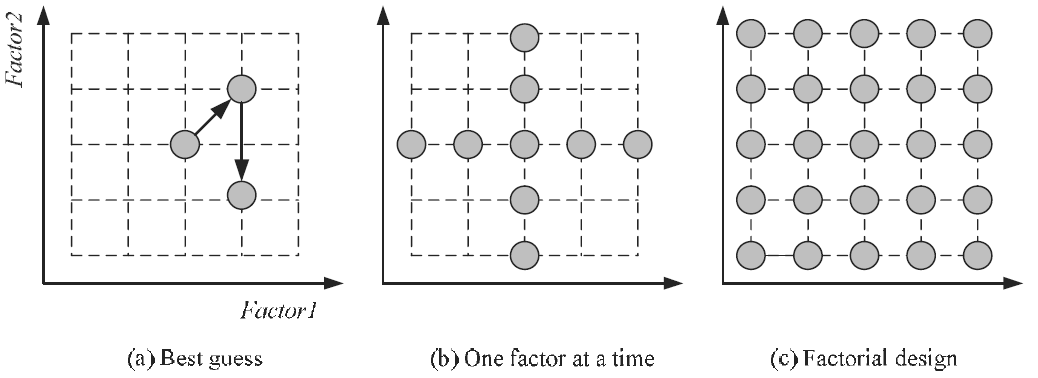

In [5]:
Image('figures/Experimentation.png',width=1000)

* Best guess
* One factor at a time
* Full/Partial Factorial design

### Principles of Experimental Design: Randomization, Replication, and Blocking

* **Randomization:** requires that the order in which the runs are carried out should be randomly determined so that the results are independent. For example, machines require some time to warm up until they operate in their normal range so tests should be done in random order for time not to bias the results.

* **Replication:** for the same configuration of (controllable) factors, the experiment should be run a number of times to average over the effect of uncontrollable factors and induced randomization. In machine learning, this is typically done by running the same algorithm on a number of resampled versions of the same dataset; this is known as **cross-validation**, which we will discuss soon.

* **Blocking:** is used to reduce or eliminate the variability due to nuisance factors that influence the response but in which we are not interested. For example, defects produced in a factory may also depend on the different batches of raw material, and this effect should be isolated from the controllable factors in the factory, such as the equipment, personnel, and so on. In ML experimentation, when we use resampling and use different subsets of the data for different replicates, we need to make sure that for example if we are comparing learning algorithms, they should all use the same set of resampled subsets.

### Guidelines for ML Experiments

Before we start experimentation, we need to have a good idea about what it is we are studying, how the data is to be collected, and how we are planning to analyze it.

1. Understand the goal of the study
2. Determine your evaluation metric(s)
3. Determine what factors to vary and how to vary them
4. Design your experiment (and get an estimate of how long it will take using a couple trial runs)
5. Perform the experiment
6. Analyze the result by performing statistical analysis
7. Draw your conclusions based on your design and result

# Evaluation Metrics for Regression Problems

Let's go back to our synthetic example:

In [39]:
def NoisySinusoidalData(N, a, b, gVar):
    '''NoisySinusoidalData(N, a, b, gVar): Generates N data points in the range [a,b] 
    sampled from a sin(2*pi*x) with additive zero-mean Gaussian random noise with standard deviation gVar'''
    x = np.linspace(a,b,N) # N input samples, evenly spaced numbers between [a,b]
    noise = npr.normal(0,gVar,N) # draw N sampled from a univariate Gaussian distribution with mean 0, gVar standard deviation and N data points
    t = np.sin(2*np.pi*x) + noise # desired values, noisy sinusoidal 
    return x, t

In [40]:
# Generate input samples and desired values

N = 40 # number of training data samples
Ntest = 10 # number test data samples
a, b = [0,1] # data samples interval
gVar_train = 0.5 # standard deviation of the zero-mean Gaussian noise observed in the training samples
gVar_test = 1 # standard deviation of the zero-mean Gaussian noise observed in the testing samples
x1, t1 = NoisySinusoidalData(N, a, b, gVar_train) # Training Data - Noisy sinusoidal
x2, t2 = NoisySinusoidalData(N, a, b, 0) # True Sinusoidal - in practice, we don't the true function
x3, t3 = NoisySinusoidalData(Ntest, a, b, gVar_test) # Test Data - Noisy sinusoidal

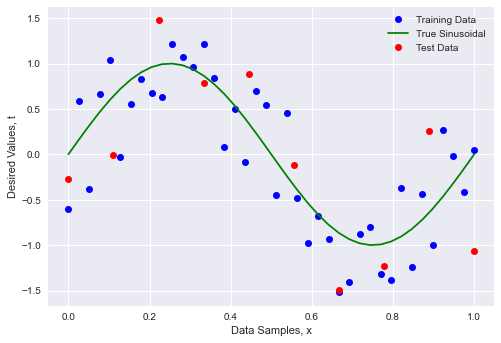

In [41]:
plt.plot(x1, t1, 'bo', label = 'Training Data')
plt.plot(x2, t2, 'g', label = 'True Sinusoidal')
plt.plot(x3, t3, 'ro', label = 'Test Data')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

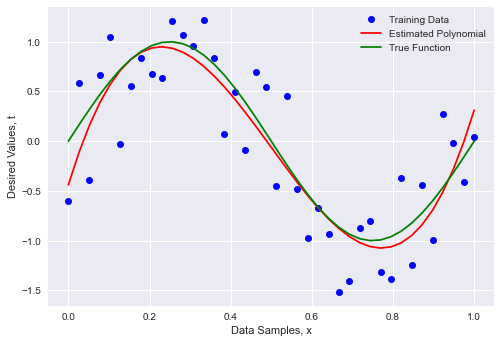

In [42]:
# Model Order
M = 3

# Find the parameters that fit the noisy sinusoidal
w, y, error = PolynomialRegression(x1,t1,M) 

plt.plot(x1,t1,'bo', label='Training Data')
plt.plot(x1,y,'r', label = 'Estimated Polynomial')
plt.plot(x2,t2,'g', label = 'True Function')
plt.legend()
plt.xlabel("Data Samples, x")
plt.ylabel("Desired Values, t");

**How would you report these results?**

We can compute the overall error:

In [43]:
np.sum((t1-y)**2)/N

0.1651849716100621

Sure. We can also compute many other statistics such as mean error, median error, maximum, etc.

But is this number useful? Is it informing us in deciding whether this model is a good fit?

To perform **goodness of fit**, in regression, we note that we are modeling a continuous-valued function that approximates some *unknown* continuous-valued function. And because we do not have the full functions **and** the data is noisy, it is simpler to characterize *both* the predictions and observational data as random variables.

A common statistic for compute goodness of fit in regression is:

* coefficient of determination (or $r^2$, r-squared) of the Quantile-Quantile (Q-Q) plot
    * the $r^2$ is the squared value of the Pearson's correlation
* Mean-difference hypothesis test

1. The **Quantile-Quantile plot** measures the one-to-one correspondence of all quantiles of the random variables:

In [46]:
y_sorted = np.sort(y)
t1_sorted = np.sort(t1)

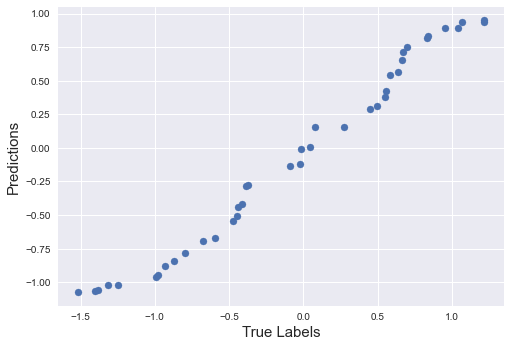

In [47]:
plt.scatter(t1_sorted, y_sorted)
plt.xlabel('True Labels',fontsize=15)
plt.ylabel('Predictions', fontsize=15);

In [48]:
import scipy.stats as stats

stats.linregress(t1_sorted, y_sorted)

LinregressResult(slope=0.8559314393479067, intercept=-0.009041686314186698, rvalue=0.9899558082581592, pvalue=6.726118575158371e-34, stderr=0.019829446220153066)

In [49]:
m, b, r, _,_ = stats.linregress(t1_sorted, y_sorted)

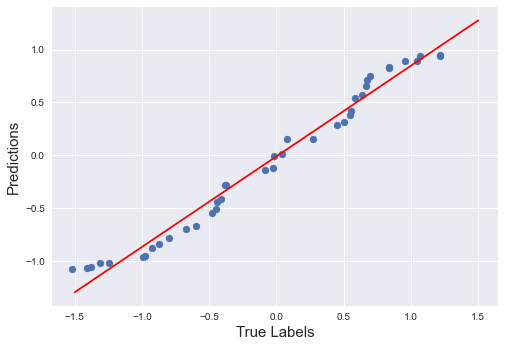

In [50]:
x = np.linspace(-1.5, 1.5, 100)
plt.scatter(t1_sorted, y_sorted)
plt.plot(x, x*m+b, 'r')
plt.xlabel('True Labels',fontsize=15)
plt.ylabel('Predictions', fontsize=15);

In [51]:
r**2

0.9800125023040652

Typical values considered acceptable $r^2>90\%$.

2. The mean-difference hypothesis test essentially poses the two hypothesis:

$H_0$: the predicted values come from the same distribution as the target values
$H_1$: the predicted values do not come from the same distribution

If we consider a significance level of $\alpha=0.05$, can we accept the null hypothesis?

* Let's build a simulation for this:

In [52]:
diff = np.mean(t1-y)
diff

-1.6057988272422107e-14

In [53]:
num_sims = 100000
event_count = 0
for sim in range(num_sims):
    sample_t = npr.choice(t1, size=len(t1))  # Bootstrap sampling
    sample_y = npr.choice(y, size=len(y))  # Bootstrap sampling
    if np.mean(sample_t-sample_y)>diff:
        event_count+=1
print('Prob of seeing an average different of ',diff,' under H0 is ~ ',event_count/num_sims)

Prob of seeing an average different of  -1.6057988272422107e-14  under H0 is ~  0.49899


**Conclusion:** The *p-value* is larger than the significance level $\alpha$, therefore we cannot reject the null hypothesis. The data indicates that the predicted values have the same distribution as the target values.